# Predicting Apple stock prices with linear regression

In [30]:
# Importing yfinance to download the stock price data
import yfinance as yf

# Downloading the Apple stock price data
aapl = yf.Ticker("AAPL")
aapl_hist = aapl.history(period="max")

In [31]:
aapl_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


<Axes: xlabel='Date'>

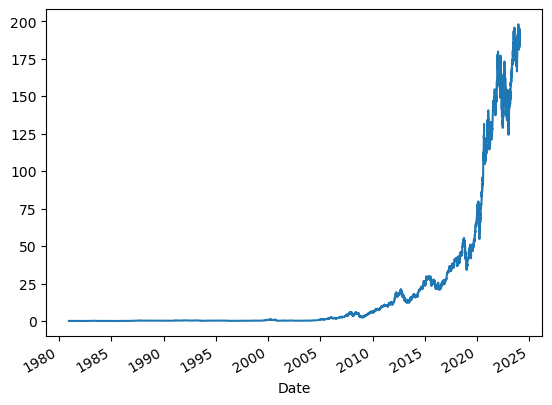

In [14]:
aapl_hist.Close.plot()

In [15]:
aapl_hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10876.000000,10876.000000,10876.000000,10876.000000,1.087600e+04,10876.000000,10876.000000
mean,19.662273,19.877163,19.456955,19.676794,3.209282e+08,0.000716,0.001563
std,42.212115,42.675686,41.782159,42.252959,3.362279e+08,0.011345,0.084131
min,0.038432,0.038432,0.038000,0.038000,0.000000e+00,0.000000,0.000000
25%,0.240788,0.245979,0.235471,0.241721,1.156220e+08,0.000000,0.000000
50%,0.418227,0.426496,0.412748,0.419753,2.085440e+08,0.000000,0.000000
75%,16.623923,16.762042,16.443283,16.580266,4.005736e+08,0.000000,0.000000
max,198.020004,199.619995,197.000000,198.110001,7.421641e+09,0.240000,7.000000


In [35]:
aapl_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10771 entries, 1980-12-12 00:00:00-05:00 to 2023-09-01 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10771 non-null  float64
 1   High          10771 non-null  float64
 2   Low           10771 non-null  float64
 3   Close         10771 non-null  float64
 4   Volume        10771 non-null  int64  
 5   Dividends     10771 non-null  float64
 6   Stock Splits  10771 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 931.2 KB


In [26]:
# Shifts the close price up by one day
close = aapl_hist['Close'].shift(-1).dropna()

# Training a linear regression model and making predictions

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = aapl_hist[['Open', 'High', 'Low', 'Volume']].loc[close.index]
y = close

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [28]:
model.score(X_test, y_test)

0.999586960374297

# Plotting the predictions against the actual values

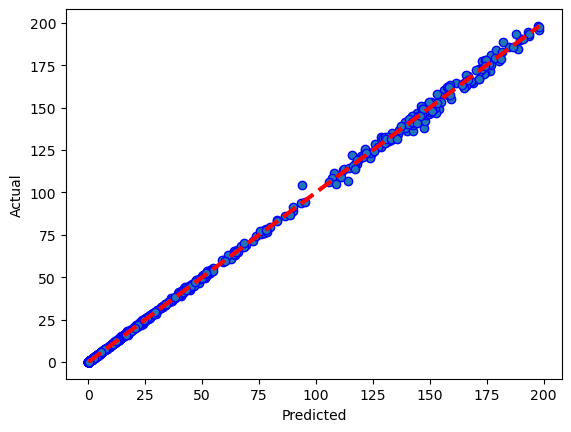

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(predictions, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()